# ORIE 4580/5580/5581 Assignment 5

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [3]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.


In [5]:
# Given data
tagged = 10
avg_total = 28.8
avg_tagged = 6

# Method of Moments estimate
N_hat = tagged * (avg_total / avg_tagged)
N_hat


48.0

<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.



In [7]:
# Given data
K = 10
n = 20
k = 4

# MLE estimate for total population
N_hat_MLE = (K * n) / k
N_hat_MLE


50.0

<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

*italicized text*<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.


\
P(Y = y) =
\begin{cases}
(1 - p)^y \, p, & y = 0, 1, \dots, 39, \\[6pt]
(1 - p)^{40}, & y = 40, \\[6pt]
0, & \text{otherwise.}
\end{cases}
\



**bold text**<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [12]:
import pandas as pd
import numpy as np


data = pd.read_csv("Soup_sales_data.csv")

Y = data["Y"].to_numpy()
n = len(Y)

uncensored = Y[Y < 40]
censored_count = np.sum(Y == 40)


def log_likelihood(p):
    if p <= 0 or p >= 1:
        return -np.inf
    ll = np.sum(np.log((1 - p)**uncensored * p))
    ll += censored_count * np.log((1 - p)**40)
    return ll

# Find MLE numerically
p_values = np.linspace(0.001, 0.999, 10000)
ll_values = [log_likelihood(p) for p in p_values]
p_hat = p_values[np.argmax(ll_values)]

print("Estimated p (MLE):", round(p_hat, 5))


Estimated p (MLE): 0.02675


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

n=10  P(at least two share) = 0.116948
n=11  P(at least two share) = 0.141141
n=12  P(at least two share) = 0.167025
n=13  P(at least two share) = 0.194410
n=14  P(at least two share) = 0.223103
n=15  P(at least two share) = 0.252901
n=16  P(at least two share) = 0.283604
n=17  P(at least two share) = 0.315008
n=18  P(at least two share) = 0.346911
n=19  P(at least two share) = 0.379119
n=20  P(at least two share) = 0.411438
n=21  P(at least two share) = 0.443688
n=22  P(at least two share) = 0.475695
n=23  P(at least two share) = 0.507297
n=24  P(at least two share) = 0.538344
n=25  P(at least two share) = 0.568700
n=26  P(at least two share) = 0.598241
n=27  P(at least two share) = 0.626859
n=28  P(at least two share) = 0.654461
n=29  P(at least two share) = 0.680969
n=30  P(at least two share) = 0.706316
n=31  P(at least two share) = 0.730455
n=32  P(at least two share) = 0.753348
n=33  P(at least two share) = 0.774972
n=34  P(at least two share) = 0.795317
n=35  P(at least two shar

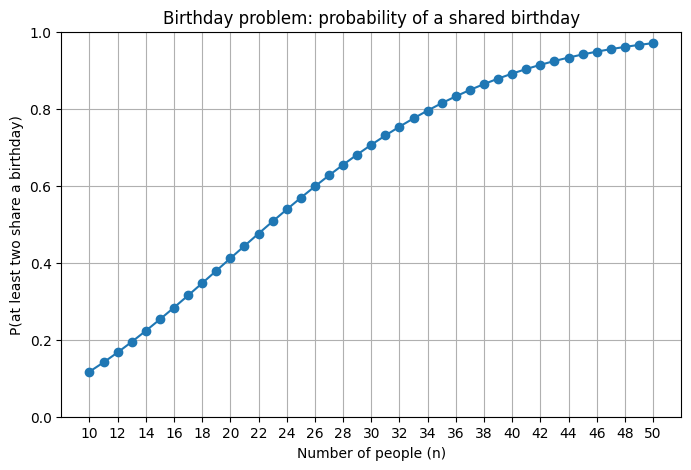

In [41]:

import matplotlib.pyplot as plt

def prob_at_least_one_match(n, days=365):
    # probability no match = prod_{k=0}^{n-1} (days - k)/days
    nums = np.arange(days, days - n, -1)  # days, days-1, ..., days-(n-1)
    prob_no_match = np.prod(nums / days)
    return 1 - prob_no_match

n_values = np.arange(10, 51)
probs = [prob_at_least_one_match(n) for n in n_values]

# Print values
for n, p in zip(n_values, probs):
    print(f"n={n:2d}  P(at least two share) = {p:.6f}")

# Plot
plt.figure(figsize=(8,5))
plt.plot(n_values, probs, marker='o')
plt.xticks(n_values[::2])  # show every other tick to avoid crowding
plt.xlabel("Number of people (n)")
plt.ylabel("P(at least two share a birthday)")
plt.title("Birthday problem: probability of a shared birthday")
plt.grid(True)
plt.ylim(0,1)
plt.show()


<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

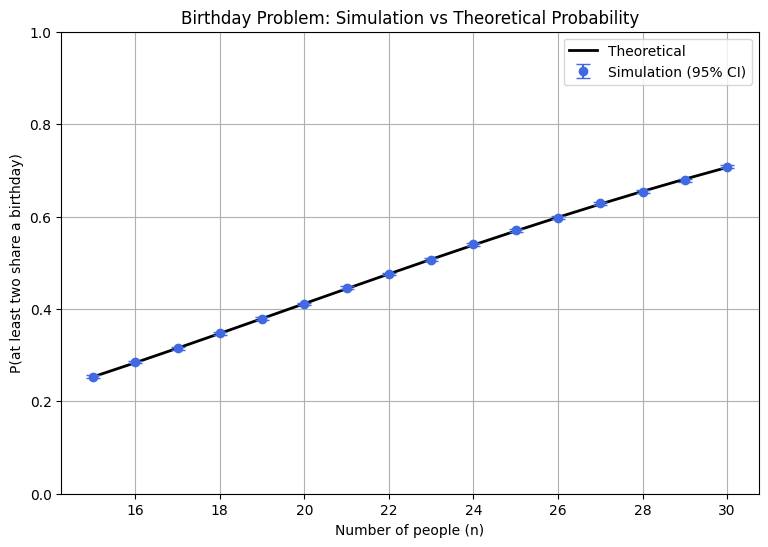

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Theoretical probability function
def prob_at_least_one_match(n, days=365):
    return 1 - np.prod([(days - k)/days for k in range(n)])

# Simulation parameters
days = 365
n_values = np.arange(15, 31)
num_sims = 100000
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Arrays to store results
estimates, conf_lower, conf_upper = [], [], []

for n in n_values:
    birthdays = np.random.randint(0, days, size=(num_sims, n))
    has_match = np.array([len(np.unique(b)) < n for b in birthdays])
    p_hat = np.mean(has_match)

    # 95% confidence interval
    se = np.sqrt(p_hat * (1 - p_hat) / num_sims)
    ci_low = p_hat - z * se
    ci_high = p_hat + z * se

    estimates.append(p_hat)
    conf_lower.append(ci_low)
    conf_upper.append(ci_high)

# Theoretical probabilities
theoretical = [prob_at_least_one_match(n) for n in n_values]

# Plot
plt.figure(figsize=(9,6))
plt.plot(n_values, theoretical, label="Theoretical", color="black", linewidth=2)
plt.errorbar(
    n_values,
    estimates,
    yerr=[np.array(estimates)-np.array(conf_lower), np.array(conf_upper)-np.array(estimates)],
    fmt='o',
    capsize=5,
    color="royalblue",
    label="Simulation (95% CI)"
)
plt.xlabel("Number of people (n)")
plt.ylabel("P(at least two share a birthday)")
plt.title("Birthday Problem: Simulation vs Theoretical Probability")
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()



<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-559107277.py:8: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('bdaydata.txt', sep='\s+', header=None, names=['Date', 'Births'], engine='python', on_bad_lines='skip')


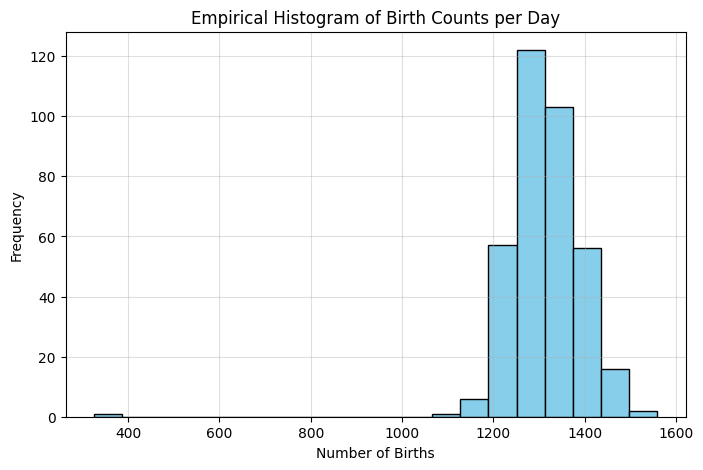

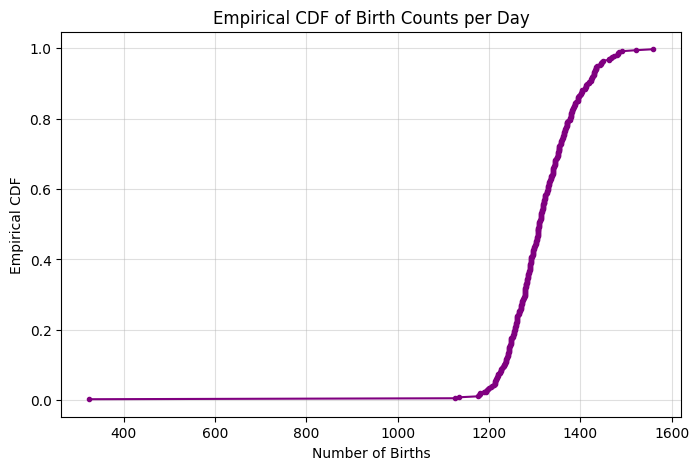

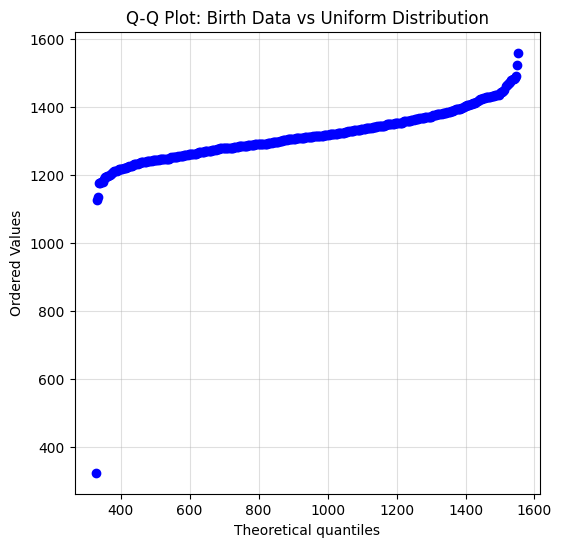

In [52]:
# --- Part (c): Real birth-date data analysis ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset safely
data = pd.read_csv('bdaydata.txt', sep='\s+', header=None, names=['Date', 'Births'], engine='python', on_bad_lines='skip')

# Keep only the first 365 rows (exclude empty/broken lines)
data = data.head(365)

# Convert Births column to numeric
data['Births'] = pd.to_numeric(data['Births'], errors='coerce')

# --- i. Empirical Histogram ---
plt.figure(figsize=(8, 5))
plt.hist(data['Births'], bins=20, color='skyblue', edgecolor='black')
plt.title('Empirical Histogram of Birth Counts per Day')
plt.xlabel('Number of Births')
plt.ylabel('Frequency')
plt.grid(alpha=0.4)
plt.show()

# --- ii. Empirical CDF ---
sorted_births = np.sort(data['Births'])
cdf = np.arange(1, len(sorted_births) + 1) / len(sorted_births)

plt.figure(figsize=(8, 5))
plt.plot(sorted_births, cdf, marker='.', color='purple')
plt.title('Empirical CDF of Birth Counts per Day')
plt.xlabel('Number of Births')
plt.ylabel('Empirical CDF')
plt.grid(alpha=0.4)
plt.show()

# --- iii. Q-Q Plot vs Uniform Distribution ---
min_b, max_b = data['Births'].min(), data['Births'].max()
plt.figure(figsize=(6, 6))
stats.probplot(data['Births'], dist=stats.uniform(loc=min_b, scale=max_b - min_b), plot=plt)
plt.title('Q-Q Plot: Birth Data vs Uniform Distribution')
plt.grid(alpha=0.4)
plt.show()


## Ans.

*[italicized text](https://)*<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [54]:
import numpy as np
from scipy import stats

# --- Load data correctly (skip header row, use only the Births column) ---
# If the file has two columns: "Date  Births"
data = np.loadtxt("bdaydata.txt", skiprows=1, usecols=1)

# --- Chi-square goodness-of-fit test ---
observed = data
expected = np.mean(data) * np.ones_like(data)

chi2_stat, chi2_p = stats.chisquare(f_obs=observed, f_exp=expected)

print("Chi-square Test:")
print(f"  Test Statistic = {chi2_stat:.2f}")
print(f"  p-value        = {chi2_p:.5f}")
if chi2_p < 0.05:
    print("  ➤ Reject H₀: Birthdays are NOT uniformly distributed.")
else:
    print("  ➤ Fail to reject H₀: No strong evidence against uniformity.")

# --- Kolmogorov–Smirnov Test ---
# Normalize data for KS test
normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))

ks_stat, ks_p = stats.kstest(normalized_data, 'uniform')

print("\nKolmogorov–Smirnov Test:")
print(f"  Test Statistic = {ks_stat:.5f}")
print(f"  p-value        = {ks_p:.5f}")
if ks_p < 0.05:
    print("  ➤ Reject H₀: Data does not follow a uniform distribution.")
else:
    print("  ➤ Fail to reject H₀: Data could be uniform.")


Chi-square Test:
  Test Statistic = 87550991.15
  p-value        = 0.00000
  ➤ Reject H₀: Birthdays are NOT uniformly distributed.

Kolmogorov–Smirnov Test:
  Test Statistic = 0.99471
  p-value        = 0.00000
  ➤ Reject H₀: Data does not follow a uniform distribution.


<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3991543206.py:6: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("bdaydata.txt", sep="\s+", dtype=str, engine='python')


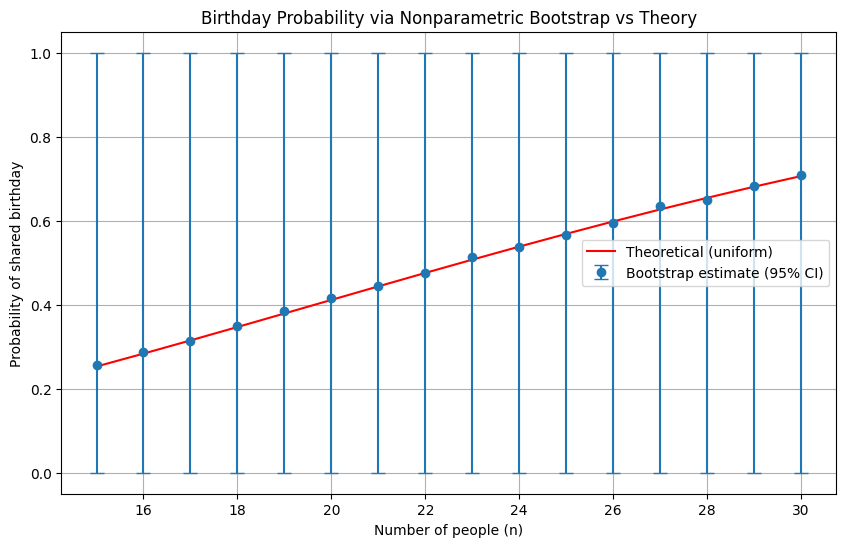

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load file as strings to handle text in any row
df = pd.read_csv("bdaydata.txt", sep="\s+", dtype=str, engine='python')

# Keep only rows where both columns are numeric
df = df[df['date'].str.isnumeric() & df['count'].str.isnumeric()]

# Convert to integers
df['date'] = df['date'].astype(int)
df['count'] = df['count'].astype(int)

# Expand counts into individual birthdays
birthdays = []
for day, count in zip(df['date'], df['count']):
    birthdays.extend([day] * count)
birthdays = np.array(birthdays)

np.random.seed(42)

# Parameters
n_values = np.arange(15, 31)
B = 10000
bootstrap_probs = []
CI_lower = []
CI_upper = []

for n in n_values:
    # Vectorized bootstrap
    samples = np.random.choice(birthdays, size=(B, n), replace=True)
    # Check for shared birthdays and convert boolean to int
    probs = np.apply_along_axis(lambda x: int(len(np.unique(x)) < n), 1, samples)
    p_hat = probs.mean()
    bootstrap_probs.append(p_hat)
    CI_lower.append(np.percentile(probs, 2.5))
    CI_upper.append(np.percentile(probs, 97.5))

# Theoretical uniform probabilities
theory_probs = []
for n in n_values:
    q = 1.0
    for k in range(n):
        q *= (365 - k)/365
    theory_probs.append(1 - q)

# Plot
plt.figure(figsize=(10,6))
plt.errorbar(n_values, bootstrap_probs,
             yerr=[np.array(bootstrap_probs)-np.array(CI_lower),
                   np.array(CI_upper)-np.array(bootstrap_probs)],
             fmt='o', capsize=5, label='Bootstrap estimate (95% CI)')
plt.plot(n_values, theory_probs, 'r-', label='Theoretical (uniform)')
plt.xlabel("Number of people (n)")
plt.ylabel("Probability of shared birthday")
plt.title("Birthday Probability via Nonparametric Bootstrap vs Theory")
plt.grid(True)
plt.legend()
plt.show()


<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

In [ ]:
#from scipy.misc import factorial
#fact_series = factorial(np.arange(n),exact=True)
#first_digit = np.zeros(n)
#for i in range(n):
# first_digit[i] = int(str(fact_series[i])[0])

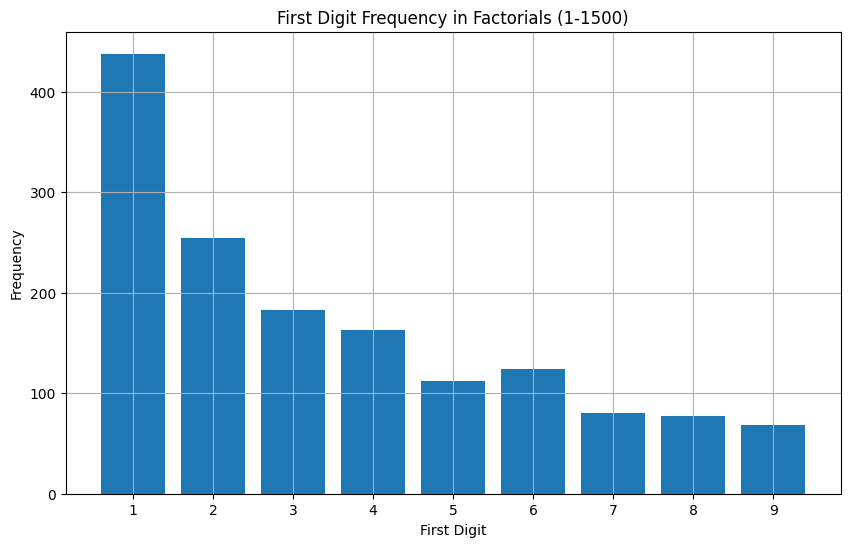

In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.special import factorial


n = 1500
n_fact = factorial(np.arange(n),exact=True)
first_digit = np.zeros(n)
for i in range(n):
  first_digit[i] = int(str(n_fact[i])[0])

count = np.zeros(10)
for i in range(1, 10):
    count[i] = np.sum(first_digit == i)

plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, 10), count[1:], tick_label=np.arange(1, 10))
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title('First Digit Frequency in Factorials (1-1500)')
plt.grid(True)
plt.show()

<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

In [17]:
from scipy.stats import chisquare

e_unif = np.full(9, n/9) #expected value

chi_stat, p = chisquare(count[1:], f_exp=e_unif)

print("Chi2 Stat:", chi_stat)
print("P Value:", p)

Chi2 Stat: 670.8000000000002
P Value: 1.3805718582880795e-139


<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

In [18]:
import scipy

benf_p = [np.log10(d + 1) - np.log10(d) for d in range(1, 10)]

# Calculate the expected frequencies for each digit
e_benf = np.array(benf_p) * n

# Running the chi-square test
chi_stat, p = scipy.stats.chisquare(count[1:], f_exp = e_benf)

print("Chi2 Stat:", chi_stat)
print("P Value:", p)

Chi2 Stat: 9.456569118464648
P Value: 0.3052548339606756


<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

In [20]:
from google.colab import files
uploaded = files.upload()


Saving us_pop.csv to us_pop.csv


In [21]:
import pandas as pd
df = pd.read_csv('us_pop.csv')

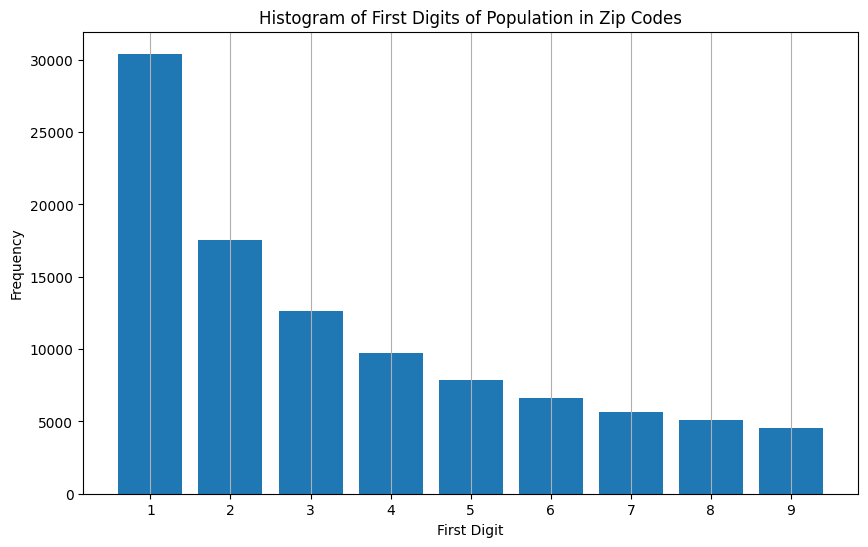

In [22]:
pp = df['population']

numone = pp.astype(str).str[0].astype(int) #first digit

plt.figure(figsize=(10, 6))
numone.hist(bins=range(1, 11), align='left', rwidth=0.8)
plt.xticks(range(1, 10))
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title('Histogram of First Digits of Population in Zip Codes')
plt.grid(axis='y')

plt.show()

In [23]:
from scipy.stats import chisquare
import numpy as np

count = numone.value_counts().sort_index()

e_unif = np.full(9, len(numone) / 9)

chi_stat, p = chisquare(count, e_unif)

print("Chi-square Statistic (Uniform):", chi_stat)
print("P-value (Uniform):", p)

Chi-square Statistic (Uniform): 50323.53572
P-value (Uniform): 0.0


In [24]:
benf_p = np.log10(1 + 1 / np.arange(1, 10)) #faster way to compute benford's law referenced by chatGPT
e_benf = benf_p * len(numone)

# Perform the chi-square test
chi_stat, p = chisquare(count, e_benf)

print("Chi-square Statistic (Benford):", chi_stat)
print("P-value (Benford):", p)

Chi-square Statistic (Benford): 11.843226818111097
P-value (Benford): 0.15833698137848726


**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.